In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
from sympy.geometry import Point, Line, Triangle
from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'geopla'
titulo = '25 - Geometría Plana'
curso = '1BC'


x,y = symbols('x, y', real=True)


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def Linea(expr) :
    eq = eval(str(parse_latex(expr)))
    p1 = Point(0,nsimplify(solve(Eq(eq.args[0].subs(x,0),eq.args[1].subs(x,0)),y)[0]))
    p2 = Point(1,nsimplify(solve(Eq(eq.args[0].subs(x,1),eq.args[1].subs(x,1)),y)[0]))
    
    return Line(p1,p2)
    #return [p1,p2]

In [3]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

display(N.base_vectors())
v = [1,2,0]
base = [i,j,k]
u=(np.array(v)*np.array(base)).sum()
type(u)
u.components
u


In [4]:
w=i+2*j
print(latex(w))
w

\mathbf{\hat{i}_{N}} + (2)\mathbf{\hat{j}_{N}}


In [5]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()


In [6]:
# Página 50 ejercicio 1

texto_ejercicio = r"""Hallar las ecuaciones paramétricas, continua, general y explícita de la recta r 
determinada por:"""

n_ejercicio = 'p050e01'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [[(-1,3),(2,5)],]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(r"A{} \ y \overrightarrow".format(s[0])+"{u}="+r"{}".format(s[1]))
    enunciado = str(s)
    sol1, sol2 =Line(Point(s[0]),Point(s[0])+Point(s[1])).equation(), Line(Point(s[0]),Point(s[0])+Point(s[1])).arbitrary_point()
    solucion.append(latex(Eq(sol1,0)) + " \ y \ " + latex(Eq(sol2,(x,y))))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Hallar las ecuaciones paramétricas, continua, general y explícita de la recta r 
determinada por:**

$A(-1, 3) \ y \overrightarrow{u}=(2, 5) \rightarrow - 5 x + 2 y - 11 = 0 \ y \ Point2D(2*t - 1, 5*t + 3) = \left ( x, \quad y\right )$

In [7]:
# Página 50 ejercicio 2

texto_ejercicio = r"""Halla un vector direccional y un vector perpendicular a la recta:"""

n_ejercicio = 'p050e02'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

enunciado_latex = [
                    r'3x+2y+8=0',
                    r'\frac{x-1}{3}=\frac{2-y}{1}',
                       r'y=5'
                      ]

enunciado, solucion = [],[]

for i, s in enumerate(enunciado_latex) : 
    enunciado = str(parse_latex(s))
    so=Linea(s).direction
    solucion.append((so,so.orthogonal_direction))
    display(md("$"+ s +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Halla un vector direccional y un vector perpendicular a la recta:**

$3x+2y+8=0 \rightarrow \left ( Point2D(1, -3/2), \quad Point2D(3/2, 1)\right )$

$\frac{x-1}{3}=\frac{2-y}{1} \rightarrow \left ( Point2D(1, -1/3), \quad Point2D(1/3, 1)\right )$

$y=5 \rightarrow \left ( Point2D(1, 0), \quad Point2D(0, 1)\right )$

In [8]:
# Página 50 ejercicio 4

texto_ejercicio = r"""Comprobar que es isósceles el triángulo de vértices:"""

n_ejercicio = 'p050e04'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(2,1),(1,2),(3,3)],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    pa, pb, pc = [Point(k) for k in s]
    tr = Triangle(pa,pb,pc)
    solucion.append(tr.is_isosceles())
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Comprobar que es isósceles el triángulo de vértices:**

$A=(2, 1), \ B=(1, 2),\  y \ C=(3, 3) \rightarrow \mathrm{True}$

In [9]:
# Página 50 ejercicio 5

texto_ejercicio = r"""Determinar m con la condición de que disten 1 unidad los siguiente puntos"""

n_ejercicio = 'p050e05'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(0,m),(1,2)],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+"\  y \ B="+str(s[1])+"")
    enunciado = str(s)
    pa, pb = [Point(k) for k in s]
    solucion.append(solve(Eq(pa.distance(pb),1),m))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar m con la condición de que disten 1 unidad los siguiente puntos**

$A=(0, m)\  y \ B=(1, 2) \rightarrow \left [ 2\right ]$

In [10]:
# Página 50 ejercicio 6

texto_ejercicio = r"""Determinar el ángulo formado por las rectas:"""

n_ejercicio = 'p050e06'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [r'4x-y-1=0',r'2x+7y-6=0'],
                    [r'-x+2y+1=0',r'3x+y+5=0'],
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("r\equiv"+str(s[0])+"\  y \ s\equiv"+str(s[1])+"")
    enunciado = str(s)

    solucion.append(float(deg(Linea(s[0]).angle_between(Linea(s[1])))))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + latex(solucion[i]) +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Determinar el ángulo formado por las rectas:**

$r\equiv4x-y-1=0\  y \ s\equiv2x+7y-6=0 \rightarrow 91.90915243299638$

$r\equiv-x+2y+1=0\  y \ s\equiv3x+y+5=0 \rightarrow 98.13010235415598$

In [11]:
# Página 50 ejercicio 7 y 8 y 28

texto_ejercicio = r"""Hallar la recta r que:"""

n_ejercicio = 'p050e07,8y28'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(1,-2),r'y=0', 120],
                    [(2,3),r'2x+y-1=0', 45],
                    [(1,2),r'2x+y-1=0',45]
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("Pasa \ por \ A"+str(s[0])+"\  y \ forma \ " +str(s[2])+ " \ grados \  con \ s\equiv "+str(s[1]))
    enunciado = str(s)
    Point(s[0])
    A, B =Linea(s[1]).coefficients[:2]
    solucion.append(latex(Eq(simplify(Line(Point(s[0]),Point(s[0])+Point(-B,A).rotate(rad(s[2]))).equation()),0)))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

# df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Hallar la recta r que:**

$Pasa \ por \ A(1, -2)\  y \ forma \ 120 \ grados \  con \ s\equiv y=0 \rightarrow \frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 1 = 0$

$Pasa \ por \ A(2, 3)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{\sqrt{2} \left(- x - 3 y + 11\right)}{2} = 0$

$Pasa \ por \ A(1, 2)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{\sqrt{2} \left(- x - 3 y + 7\right)}{2} = 0$

In [12]:
# Página 50 ejercicio 7 y 8 y 28

texto_ejercicio = r"""Hallar la recta r que:"""

n_ejercicio = 'p050e07,8y28'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(2,3),r'2x+y-1=0', 45],
                    [(1,2),r'2x+y-1=0',45],
                    [(1,-2),r'y=0', 120],
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("Pasa \ por \ A"+str(s[0])+"\  y \ forma \ " +str(s[2])+ " \ grados \  con \ s\equiv "+str(s[1]))
    enunciado = str(s)
    r, p, an = Linea(s[1]), Point(s[0]), rad(s[2])
    u = r.direction
    v = Point(1,x)
    #display(r,p,an)
    #u.dot(v), u.distance((0,0)), r.equation()
    m = solve(abs(cos(an))-abs(u.dot(v))/(u.distance((0,0))*v.distance((0,0))))[0]

    eq = Eq(Line(s[0],slope=m).equation(),0)
    solucion.append(latex(eq))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    p1.extend(p2)
    p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Hallar la recta r que:**

$Pasa \ por \ A(2, 3)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{x}{3} + y - \frac{11}{3} = 0$

$Pasa \ por \ A(1, 2)\  y \ forma \ 45 \ grados \  con \ s\equiv 2x+y-1=0 \rightarrow \frac{x}{3} + y - \frac{7}{3} = 0$

$Pasa \ por \ A(1, -2)\  y \ forma \ 120 \ grados \  con \ s\equiv y=0 \rightarrow \sqrt{3} x + y - \sqrt{3} + 2 = 0$

In [13]:
# Página 51 ejercicio 20

texto_ejercicio = r"""Calcula el vértice C de un triángulo isósceles ABC, sabiendo que:"""

n_ejercicio = 'p051e20'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                    [(4,0),(6,2),r'3x+y-1=0'],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(" A"+str(s[0])+"\  , \ B=" +str(s[1])+ " \ y \  C \in r\equiv "+str(s[2]))
    enunciado = str(s)
    r = Linea(s[2])

    P = Point(x,y)

    r.distance(Point(s[0]))

    sol = solve([P.distance(s[0])-P.distance(s[1]),r.equation()])
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Calcula el vértice C de un triángulo isósceles ABC, sabiendo que:**

$ A(4, 0)\  , \ B=(6, 2) \ y \  C \in r\equiv 3x+y-1=0 \rightarrow \left [ \left \{ x : - \frac{5}{2}, \quad y : \frac{17}{2}\right \}\right ]$

In [14]:
# Página 51 ejercicio 21

texto_ejercicio = r"""Determinar el punto simétrico al punto y respecto de la recta siguientes:"""

n_ejercicio = 'p051e21'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(2,5),r'5x+y=2'],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(" A"+str(s[0])+" \ y \   r\equiv "+str(s[1]))
    enunciado = str(s)
    sol=[]
    p = Point(s[0])
    r1 = Linea(s[1])
    sol.append(r1.perpendicular_line(p).equation())
    dict = solve([r1.equation(),r1.perpendicular_line(p).equation()])
    M = Point(list(dict.values()))
    sol.append(M)
    
    sol.append(p.rotate(pi, M))
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Determinar el punto simétrico al punto y respecto de la recta siguientes:**

$ A(2, 5) \ y \   r\equiv 5x+y=2 \rightarrow \left [ - x + 5 y - 23, \quad Point2D(-1/2, 9/2), \quad Point2D(-3, 4)\right ]$

In [15]:
# Página 51 ejercicio 23

texto_ejercicio = r"""Hallar la ecuación de la recta paralela y que dista una unidad a la recta:"""

n_ejercicio = 'p051e23'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  r'4x-3y=0',                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("r\equiv "+str(s))
    enunciado = str(s)
    P = Point(x,y)
    r1 = Linea(s)
    #r1.slope, Eq(radsimp(cancel(r1.distance(P)-1)),0)

    
    
    sol=Eq(factor(expand(r1.distance(P)))-1,0)
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar la ecuación de la recta paralela y que dista una unidad a la recta:**

$r\equiv 4x-3y=0 \rightarrow \frac{\left|{4 x - 3 y}\right|}{5} - 1 = 0$

In [16]:
# Página 51 ejercicio 29

texto_ejercicio = r"""Halla el valor del ángulo que forma con el eje de abscisas la mediatriz del segmento determinado por los puntos:"""

n_ejercicio = 'p051e29'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(1, - 3), (4, 5)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+"\ y \ B="+str(s[1])+"")
    enunciado = str(s)
    A, B = Point(s[0]), Point(s[1])
    sol = float(deg(Line(A,B).perpendicular_line(A.midpoint(B)).angle_between(Line(Point(0,0),slope=0))))
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    
    #p1 = plot_implicit(Linea(s[1]).equation(),show=False)
    #p2 = plot_implicit(Line(s[0],slope=m).equation(),show=False)
    #p1.extend(p2)
    #p1.show()

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Halla el valor del ángulo que forma con el eje de abscisas la mediatriz del segmento determinado por los puntos:**

$A=(1, -3)\ y \ B=(4, 5) \rightarrow 159.44395478041653$

In [17]:
# Página 51 ejercicio 33 y 58

texto_ejercicio = r"""Calcula el área del triángulo de vértices:"""

n_ejercicio = 'p051e33y58'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(-1, 1), (1, 4), (2,-3)], 
                    [(0,-1), (2,0),(1,1)]
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s]
    T=Triangle(A,B,C)
    sol=[A.distance(B),T.altitudes[C],T.altitudes[C].length, abs(T.area)]
    solucion.append(latex(sol[3]))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Calcula el área del triángulo de vértices:**

$A=(-1, 1), \ B=(1, 4),\  y \ C=(2, -3) \rightarrow \frac{17}{2}$

$A=(0, -1), \ B=(2, 0),\  y \ C=(1, 1) \rightarrow \frac{3}{2}$

In [18]:
# Página 51 ejercicio 35

texto_ejercicio = r"""Hallar las ecuaciones de las alturas y las coordenadas del ortocentro del triángulo de vértices:"""

n_ejercicio = 'p051e35'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(1, 0), (-2, 5), (-1,-3)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s]
    T=Triangle(A,B,C)
    sol=([simplify(Eq(Line(k).equation(),0)) for k in list(T.altitudes.values())], T.orthocenter)    
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar las ecuaciones de las alturas y las coordenadas del ortocentro del triángulo de vértices:**

$A=(1, 0), \ B=(-2, 5),\  y \ C=(-1, -3) \rightarrow \left ( \left [ \frac{19 x}{65} - \frac{152 y}{65} - \frac{19}{65} = 0, \quad \frac{38 x}{13} + \frac{57 y}{13} - \frac{209}{13} = 0, \quad - \frac{57 x}{34} + \frac{95 y}{34} + \frac{114}{17} = 0\right ], \quad Point2D(91/19, 9/19)\right )$

In [19]:
# Página 51 ejercicio 38

texto_ejercicio = r"""Hallar la ecuación de la recta paralela a la bisectriz del segundo cuadrante y que pasar por el punto:"""

n_ejercicio = 'p051e38'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  (3,5),                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s))
    enunciado = str(s)
    r = Linea(r'y=-x')
    A = Point(s)
    sol = Eq(Line(A,slope=r.slope).equation(),0)    
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar la ecuación de la recta paralela a la bisectriz del segundo cuadrante y que pasar por el punto:**

$A=(3, 5) \rightarrow x + y - 8 = 0$

In [20]:
# Página 51 ejercicio 45

texto_ejercicio = r"""Hallar el punto de la bisectriz de los cuadrantes 2 y 4, que equidista de los puntos:"""

n_ejercicio = 'p051e45'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(4, -2),(10, 0)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+"\ y \ B="+str(s[1])+"")
    enunciado = str(s)
    P = Point(x,y)
    r = Linea(r'y=-x')
    A, B = [Point(k) for k in s]
    sol = solve([P.distance(A)-P.distance(B), r.equation()])    
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar el punto de la bisectriz de los cuadrantes 2 y 4, que equidista de los puntos:**

$A=(4, -2)\ y \ B=(10, 0) \rightarrow \left [ \left \{ x : 10, \quad y : -10\right \}\right ]$

In [21]:
# Página 52 ejercicio 46

texto_ejercicio = r"""Hallar la longitud de la altura del triángulo ABC que pasa por C, y su área, si:"""

n_ejercicio = 'p052e46'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(2, - 1),(- 5, 1), (0, 3)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s]
    T = Triangle(A,B,C)
    sol = [Line(A,B).distance(C), abs(T.area) ]
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar la longitud de la altura del triángulo ABC que pasa por C, y su área, si:**

$A=(2, -1), \ B=(-5, 1),\  y \ C=(0, 3) \rightarrow \left [ \frac{24 \sqrt{53}}{53}, \quad 12\right ]$

In [22]:
# Página 52 ejercicio 47

texto_ejercicio = r"""Hallar las ecuaciones de las rectas de pendiente finita que:"""

n_ejercicio = 'p052e47'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(1, -2),(3, 1)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("Pasen \ por \ A="+str(s[0])+", \ y \  disten \ 2 \ de \ B="+str(s[1])+"")
    enunciado = str(s)
    A, B = [Point(k) for k in s]
    pendiente = solve(Line(A, slope=x).distance(B)-2)
    sol=[Eq(Line(A,slope=mi).equation(),0) for mi in pendiente]   
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Hallar las ecuaciones de las rectas de pendiente finita que:**

$Pasen \ por \ A=(1, -2), \ y \  disten \ 2 \ de \ B=(3, 1) \rightarrow \left [ - \frac{5 x}{12} + y + \frac{29}{12} = 0\right ]$

In [23]:
# Página 52 ejercicio 57

texto_ejercicio = r"""Dado el triángulo, hallar la mediana correspondiente al vértice A, la altura correspondiente al vértice B y la mediatriz correspondiente al lado AB. Siendo:"""

n_ejercicio = 'p052e57'

display(md("**"+texto_ejercicio+"**"))
 
# vectores iniciales correspondientes al texto del enunciado

pre_enunciado_latex = [
                  [(2,-3),(-2,-2),(0,3)],                                   
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append("A="+str(s[0])+", \ B="+str(s[1])+",\  y \ C="+str(s[2])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s]
    T=Triangle(A,B,C)
    sol=[Eq(Line(T.medians[A]).equation(),0),
        Eq(factor(Line(T.altitudes[B]).equation()),0),
        Eq(Line(A,B).perpendicular_line(A.midpoint(B)).equation(),0)] 
    solucion.append(latex(sol))
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Dado el triángulo, hallar la mediana correspondiente al vértice A, la altura correspondiente al vértice B y la mediatriz correspondiente al lado AB. Siendo:**

$A=(2, -3), \ B=(-2, -2),\  y \ C=(0, 3) \rightarrow \left [ - \frac{7 x}{2} - 3 y - 2 = 0, \quad - \frac{11 \left(x - 3 y - 4\right)}{10} = 0, \quad 4 x - y - \frac{5}{2} = 0\right ]$

In [24]:
s=[(2,-3),(-2,-2),(0,3)]
A, B, C = [Point(k) for k in s]
T=Triangle(A,B,C)
[Eq(Line(T.medians[A]).equation(),0),
Eq(factor(Line(T.altitudes[B]).equation()),0),
Eq(Line(A,B).perpendicular_line(A.midpoint(B)).equation(),0)]


In [25]:
# Página 52 ejercicio 58

texto_ejercicio = r"""Determina el valor de m para que el área del triángulo ABC sea:"""

n_ejercicio = 'p052e58'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciadom 

m = symbols('m')

pre_enunciado_latex = [
                    [6, (2, 1),(-3, 5),(4, m)],
                    
                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) : 
    enunciado_latex.append(str(s[0])+"\ unidades \ cuadradas, \ siendo \ A="+str(s[1])+", \ B="+str(s[2])+"\  y \ C="+str(s[3])+"")
    enunciado = str(s)
    A, B, C = [Point(k) for k in s[1:]]
    T=Triangle(A,B,C)
    sol=latex(solve(Eq(T.area,s[0])))
    solucion.append(sol)
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=True), ignore_index=True)


**Determina el valor de m para que el área del triángulo ABC sea:**

$6\ unidades \ cuadradas, \ siendo \ A=(2, 1), \ B=(-3, 5)\  y \ C=(4, m) \rightarrow \left [ -3\right ]$

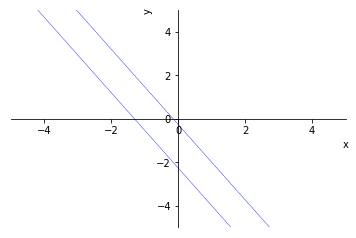

In [26]:
%matplotlib inline
p1 = plot_implicit(Linea(r'\frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 1 = 0').equation(),show=False)
p2 = plot_implicit(Linea(r'\frac{\sqrt{3} x}{2} + \frac{y}{2} - \frac{\sqrt{3}}{2} + 2 = 0').equation(),show=False)
p1.extend(p2)
p1.show()

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


'% This file was created by matplotlib2tikz v0.6.18.\n\\begin{tikzpicture}\n\n\\definecolor{color0}{rgb}{0.886274509803922,0.290196078431373,0.2}\n\\definecolor{color1}{rgb}{0.203921568627451,0.541176470588235,0.741176470588235}\n\n\\begin{axis}[\naxis background/.style={fill=white!89.80392156862746!black},\naxis line style={white},\ntick align=outside,\ntick pos=left,\ntitle={Simple plot $\\frac{\\alpha}{2}$},\nx grid style={white},\nxlabel={time (s)},\nxmajorgrids,\nxmin=-0.095, xmax=1.995,\ny grid style={white},\nylabel={Voltage (mV)},\nymajorgrids,\nymin=-1.1, ymax=1.1\n]\n\\addplot [line width=1.64pt, color0, mark=*, mark size=3, mark options={solid}, forget plot]\ntable [row sep=\\\\]{%\n0\t0 \\\\\n0.1\t0.587785252292473 \\\\\n0.2\t0.951056516295154 \\\\\n0.3\t0.951056516295154 \\\\\n0.4\t0.587785252292473 \\\\\n0.5\t1.22464679914735e-16 \\\\\n0.6\t-0.587785252292473 \\\\\n0.7\t-0.951056516295154 \\\\\n0.8\t-0.951056516295154 \\\\\n0.9\t-0.587785252292473 \\\\\n1\t-2.449293598294

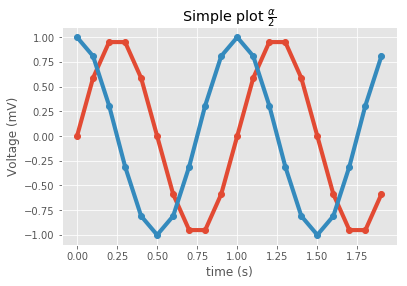

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

t = np.arange(0.0, 2.0, 0.1)
s = np.sin(2 * np.pi * t)
s2 = np.cos(2 * np.pi * t)
plt.plot(t, s, "o-", lw=4.1)
plt.plot(t, s2, "o-", lw=4.1)
plt.xlabel("time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Simple plot $\\frac{\\alpha}{2}$")
plt.grid(True)

from matplotlib2tikz import save as tikz_save
from matplotlib2tikz import get_tikz_code
tikz_save("test.tex")
get_tikz_code("test.tex")

In [28]:
df_ejercicios.to_csv('ejercicios25.csv', index = False)

In [29]:
df_ejercicios = pd.read_csv('ejercicios25.csv', index_col= None)

In [30]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,"A(-1, 3) \ y \overrightarrow{u}=(2, 5)","[(-1, 3), (2, 5)]","- 5 x + 2 y - 11 = 0 \ y \ Point2D(2*t - 1, 5*...","Hallar las ecuaciones paramétricas, continua, ...",1BC,25 - Geometría Plana,p050e01,1,2,1,True,True
1,3x+2y+8=0,"Eq(y, 5)","(Point2D(1, -3/2), Point2D(3/2, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True
2,\frac{x-1}{3}=\frac{2-y}{1},"Eq(y, 5)","(Point2D(1, -1/3), Point2D(1/3, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True
3,y=5,"Eq(y, 5)","(Point2D(1, 0), Point2D(0, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True
4,"A=(2, 1), \ B=(1, 2),\ y \ C=(3, 3)","[(2, 1), (1, 2), (3, 3)]",True,Comprobar que es isósceles el triángulo de vér...,1BC,25 - Geometría Plana,p050e04,1,2,1,True,True
5,"A=(0, m)\ y \ B=(1, 2)","[(0, m), (1, 2)]",[2],Determinar m con la condición de que disten 1 ...,1BC,25 - Geometría Plana,p050e05,1,2,1,True,True
6,r\equiv4x-y-1=0\ y \ s\equiv2x+7y-6=0,"['-x+2y+1=0', '3x+y+5=0']",91.90915243299638,Determinar el ángulo formado por las rectas:,1BC,25 - Geometría Plana,p050e06,1,2,1,True,True
7,r\equiv-x+2y+1=0\ y \ s\equiv3x+y+5=0,"['-x+2y+1=0', '3x+y+5=0']",98.13010235415598,Determinar el ángulo formado por las rectas:,1BC,25 - Geometría Plana,p050e06,1,2,1,True,True
8,"Pasa \ por \ A(2, 3)\ y \ forma \ 45 \ grados...","[(1, -2), 'y=0', 120]",\frac{x}{3} + y - \frac{11}{3} = 0,Hallar la recta r que:,1BC,25 - Geometría Plana,"p050e07,8y28",1,2,1,True,True
9,"Pasa \ por \ A(1, 2)\ y \ forma \ 45 \ grados...","[(1, -2), 'y=0', 120]",\frac{x}{3} + y - \frac{7}{3} = 0,Hallar la recta r que:,1BC,25 - Geometría Plana,"p050e07,8y28",1,2,1,True,True


In [31]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p050e01

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,"A(-1, 3) \ y \overrightarrow{u}=(2, 5)","[(-1, 3), (2, 5)]","- 5 x + 2 y - 11 = 0 \ y \ Point2D(2*t - 1, 5*...","Hallar las ecuaciones paramétricas, continua, ...",1BC,25 - Geometría Plana,p050e01,1,2,1,True,True


**Ejercicio: **p050e02

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
1,3x+2y+8=0,"Eq(y, 5)","(Point2D(1, -3/2), Point2D(3/2, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True
2,\frac{x-1}{3}=\frac{2-y}{1},"Eq(y, 5)","(Point2D(1, -1/3), Point2D(1/3, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True
3,y=5,"Eq(y, 5)","(Point2D(1, 0), Point2D(0, 1))",Halla un vector direccional y un vector perpen...,1BC,25 - Geometría Plana,p050e02,1,2,1,True,True


**Ejercicio: **p050e04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
4,"A=(2, 1), \ B=(1, 2),\ y \ C=(3, 3)","[(2, 1), (1, 2), (3, 3)]",True,Comprobar que es isósceles el triángulo de vér...,1BC,25 - Geometría Plana,p050e04,1,2,1,True,True


**Ejercicio: **p050e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
5,"A=(0, m)\ y \ B=(1, 2)","[(0, m), (1, 2)]",[2],Determinar m con la condición de que disten 1 ...,1BC,25 - Geometría Plana,p050e05,1,2,1,True,True


**Ejercicio: **p050e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
6,r\equiv4x-y-1=0\ y \ s\equiv2x+7y-6=0,"['-x+2y+1=0', '3x+y+5=0']",91.90915243299638,Determinar el ángulo formado por las rectas:,1BC,25 - Geometría Plana,p050e06,1,2,1,True,True
7,r\equiv-x+2y+1=0\ y \ s\equiv3x+y+5=0,"['-x+2y+1=0', '3x+y+5=0']",98.13010235415598,Determinar el ángulo formado por las rectas:,1BC,25 - Geometría Plana,p050e06,1,2,1,True,True


**Ejercicio: **p050e07,8y28

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
8,"Pasa \ por \ A(2, 3)\ y \ forma \ 45 \ grados...","[(1, -2), 'y=0', 120]",\frac{x}{3} + y - \frac{11}{3} = 0,Hallar la recta r que:,1BC,25 - Geometría Plana,"p050e07,8y28",1,2,1,True,True
9,"Pasa \ por \ A(1, 2)\ y \ forma \ 45 \ grados...","[(1, -2), 'y=0', 120]",\frac{x}{3} + y - \frac{7}{3} = 0,Hallar la recta r que:,1BC,25 - Geometría Plana,"p050e07,8y28",1,2,1,True,True
10,"Pasa \ por \ A(1, -2)\ y \ forma \ 120 \ grad...","[(1, -2), 'y=0', 120]",\sqrt{3} x + y - \sqrt{3} + 2 = 0,Hallar la recta r que:,1BC,25 - Geometría Plana,"p050e07,8y28",1,2,1,True,True


**Ejercicio: **p051e20

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
11,"A(4, 0)\ , \ B=(6, 2) \ y \ C \in r\equiv 3...","[(4, 0), (6, 2), '3x+y-1=0']","\left [ \left \{ x : - \frac{5}{2}, \quad y : ...",Calcula el vértice C de un triángulo isósceles...,1BC,25 - Geometría Plana,p051e20,1,1,1,True,True


**Ejercicio: **p051e21

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
12,"A(2, 5) \ y \ r\equiv 5x+y=2","[(2, 5), '5x+y=2']","\left [ - x + 5 y - 23, \quad Point2D(-1/2, 9/...",Determinar el punto simétrico al punto y respe...,1BC,25 - Geometría Plana,p051e21,1,1,1,True,True


**Ejercicio: **p051e23

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,r\equiv 4x-3y=0,4x-3y=0,\frac{\left|{4 x - 3 y}\right|}{5} - 1 = 0,Hallar la ecuación de la recta paralela y que ...,1BC,25 - Geometría Plana,p051e23,1,1,1,True,True


**Ejercicio: **p051e29

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
14,"A=(1, -3)\ y \ B=(4, 5)","[(1, -3), (4, 5)]",159.44395478041653,Halla el valor del ángulo que forma con el eje...,1BC,25 - Geometría Plana,p051e29,1,1,1,True,True


**Ejercicio: **p051e33y58

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,"A=(-1, 1), \ B=(1, 4),\ y \ C=(2, -3)","[(0, -1), (2, 0), (1, 1)]",\frac{17}{2},Calcula el área del triángulo de vértices:,1BC,25 - Geometría Plana,p051e33y58,1,1,1,True,True
16,"A=(0, -1), \ B=(2, 0),\ y \ C=(1, 1)","[(0, -1), (2, 0), (1, 1)]",\frac{3}{2},Calcula el área del triángulo de vértices:,1BC,25 - Geometría Plana,p051e33y58,1,1,1,True,True


**Ejercicio: **p051e35

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
17,"A=(1, 0), \ B=(-2, 5),\ y \ C=(-1, -3)","[(1, 0), (-2, 5), (-1, -3)]",\left ( \left [ \frac{19 x}{65} - \frac{152 y}...,Hallar las ecuaciones de las alturas y las coo...,1BC,25 - Geometría Plana,p051e35,1,1,1,True,True


**Ejercicio: **p051e38

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
18,"A=(3, 5)","(3, 5)",x + y - 8 = 0,Hallar la ecuación de la recta paralela a la b...,1BC,25 - Geometría Plana,p051e38,1,1,1,True,True


**Ejercicio: **p051e45

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
19,"A=(4, -2)\ y \ B=(10, 0)","[(4, -2), (10, 0)]","\left [ \left \{ x : 10, \quad y : -10\right \...",Hallar el punto de la bisectriz de los cuadran...,1BC,25 - Geometría Plana,p051e45,1,1,1,True,True


**Ejercicio: **p052e46

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
20,"A=(2, -1), \ B=(-5, 1),\ y \ C=(0, 3)","[(2, -1), (-5, 1), (0, 3)]","\left [ \frac{24 \sqrt{53}}{53}, \quad 12\right ]",Hallar la longitud de la altura del triángulo ...,1BC,25 - Geometría Plana,p052e46,1,1,1,True,True


**Ejercicio: **p052e47

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
21,"Pasen \ por \ A=(1, -2), \ y \ disten \ 2 \ d...","[(1, -2), (3, 1)]",\left [ - \frac{5 x}{12} + y + \frac{29}{12} =...,Hallar las ecuaciones de las rectas de pendien...,1BC,25 - Geometría Plana,p052e47,1,1,1,True,True


**Ejercicio: **p052e57

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
22,"A=(2, -3), \ B=(-2, -2),\ y \ C=(0, 3)","[(2, -3), (-2, -2), (0, 3)]","\left [ - \frac{7 x}{2} - 3 y - 2 = 0, \quad -...","Dado el triángulo, hallar la mediana correspon...",1BC,25 - Geometría Plana,p052e57,1,1,1,True,True


**Ejercicio: **p052e58

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,"6\ unidades \ cuadradas, \ siendo \ A=(2, 1), ...","[6, (2, 1), (-3, 5), (4, m)]",\left [ -3\right ],Determina el valor de m para que el área del t...,1BC,25 - Geometría Plana,p052e58,1,1,1,True,True
